In [1]:
import pandas as pd

In [2]:
df_september_polls = pd.read_csv('/Users/maxsonntag/Downloads/september_polls.csv')
#df_president_polls['candidate_name'].value_counts()
#df_september_polls.head()
df_september_polls['end_date'].value_counts()
#df_september_polls.info()
df = df_september_polls[df_september_polls['end_date'].str.contains('9')]# & df_september_polls['state'] == 'National']
df[df['state'] == 'Arizona']
#df[(df['column1'] == specified_value) & (df['column2'].str.contains(partial_string))]
df_september_polls['state'].value_counts()
df = df_september_polls[df_september_polls['state'].isin(['National','Pennsylvania','Michigan','Wisconsin','Arizona','North Carolina','Georgia','Nevada','Texas','California'])]
#df[df['pollster_rating_name'] == ].unique()

In [3]:
df[df['pollster_rating_name'] == 'Trafalgar Group'] #22 for all the swing states only
df[df['pollster_rating_name'] == 'Big Village'] #12 national
df[df['pollster_rating_name'] == 'co/efficient'] #6 penn wisc mich
df[df['pollster_rating_name'] == 'Patriot Polling'] #16 rows swingstates & national
df[df['pollster_rating_name'] == 'Wick'] #2 rows Pennsylvania
df[df['pollster_rating_name'] == 'McLaughlin & Associates'] #4rows national
df[df['pollster_rating_name'] == 'Lake Research Partners'] #2 rows Texas
df[df['pollster_rating_name'] == 'Change Research'] #6 rows national
df[df['pollster_rating_name'] == 'Public Policy Polling'] #8 rows texas georgia penn ariz
df[df['pollster_rating_name'] == 'BK Strategies'] #2 rows wisc
df[df['pollster_rating_name'] == 'Strategies 360'] #4 rows nev ariz
df[df['pollster_rating_name'] == 'Global Strategy Group/GBAO (Navigator Research)'] #10 rows swing states
df[df['pollster_rating_name'] == 'Moore Information Group'] #2 rows arizona

,model_date,timestamp,cycle,state,created_at,start_date,end_date,election_date,pollster_rating_name,pollster_rating_id,...,region_num,response,pollster,pollster_coded,state_pollster,state_pollster_coded,mode,mode_coded,day_of_timeline,major_candidate_still_running
696,2024-09-18,2024-09-18T17:02:41Z,2024,Arizona,2024-08-15,2024-07-31,2024-08-05,2024-11-05,Moore Information Group,217,...,10.0,42.0,217,31,AZ217,6,Other,8,12,1
697,2024-09-18,2024-09-18T17:02:41Z,2024,Arizona,2024-08-15,2024-07-31,2024-08-05,2024-11-05,Moore Information Group,217,...,10.0,44.0,217,31,AZ217,6,Other,8,12,1


In [7]:
df['state'].value_counts()
#before cleaning for bad pollster ratings
#National          270
#Pennsylvania       86
#Michigan           74
#Wisconsin          72
#Arizona            60
#North Carolina     56
#Georgia            54
#Nevada             40
#Texas              16
#California          6
exclude_pollsters = ['Trafalgar Group','Big Village','co/efficient','Patriot Polling','Wick','McLaughlin & Associates','Lake Research Partners','Change Research','Public Policy Polling','BK Strategies','Strategies 360','Global Strategy Group/GBAO (Navigator Research)','Moore Information Group']
df = df[~df['pollster_rating_name'].isin(exclude_pollsters)]
df['state'].value_counts()
#National          246
#Pennsylvania       72
#Michigan           66
#Wisconsin          62
#North Carolina     48
#Georgia            48
#Arizona            46
#Nevada             32
#Texas              12
#California          6
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 923
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   model_date                      638 non-null    object 
 1   timestamp                       638 non-null    object 
 2   cycle                           638 non-null    int64  
 3   state                           638 non-null    object 
 4   created_at                      638 non-null    object 
 5   start_date                      638 non-null    object 
 6   end_date                        638 non-null    object 
 7   election_date                   638 non-null    object 
 8   pollster_rating_name            638 non-null    object 
 9   pollster_rating_id              638 non-null    int64  
 10  poll_id                         638 non-null    int64  
 11  question_id                     638 non-null    int64  
 12  url                             638 non-n

In [9]:
#df = df.iloc[:, [3, 4, 5, 6, 19, 20]]
#df['end_date'].value_counts() #22.07. earliest 17.09. latest
#df['created_at'].value_counts() #23.07. earliest 18.09. latest
#df.info()
#df = df.iloc[:, [0, 1, 4, 5]]
df['created_at'].value_counts()

created_at
2024-08-29    54
2024-09-10    54
2024-09-09    36
2024-08-19    36
2024-07-26    32
2024-08-14    28
2024-07-30    24
2024-08-30    22
2024-09-17    18
2024-08-06    16
2024-07-25    14
2024-09-04    14
2024-08-08    14
2024-08-15    12
2024-08-01    12
2024-08-22    12
2024-08-23    12
2024-07-31    12
2024-09-18    12
2024-09-13    12
2024-08-31    12
2024-08-28    12
2024-08-05    10
2024-09-08    10
2024-09-14    10
2024-09-11    10
2024-08-27    10
2024-09-05    10
2024-09-06     8
2024-08-12     8
2024-08-10     8
2024-08-17     8
2024-08-16     6
2024-08-25     6
2024-09-02     6
2024-08-09     6
2024-08-07     6
2024-08-02     4
2024-07-24     4
2024-08-18     4
2024-08-26     4
2024-09-12     4
2024-07-23     4
2024-08-13     2
2024-08-04     2
2024-08-11     2
2024-08-21     2
2024-09-01     2
2024-07-27     2
2024-09-03     2
2024-08-03     2
2024-07-29     2
2024-07-28     2
2024-09-15     2
Name: count, dtype: int64

In [11]:
#date_list = df['created_at'].value_counts()
#date_list = date_list[0]
#date_list
pivot_table = df.pivot_table(index='created_at',columns='state', aggfunc='count')
pivot_table

candidate_name                                              \
state             Arizona California Georgia Michigan National Nevada   
created_at                                                              
2024-07-23            NaN        NaN     NaN      NaN      4.0    NaN   
2024-07-24            NaN        NaN     2.0      NaN      2.0    NaN   
2024-07-25            2.0        NaN     2.0      2.0      4.0    NaN   
2024-07-26            2.0        NaN     2.0      8.0      6.0    2.0   
2024-07-27            NaN        NaN     2.0      NaN      NaN    NaN   
2024-07-28            NaN        NaN     NaN      NaN      2.0    NaN   
2024-07-29            NaN        NaN     NaN      NaN      2.0    NaN   
2024-07-30            2.0        NaN     2.0      2.0      8.0    2.0   
2024-07-31            NaN        NaN     NaN      NaN     10.0    NaN   
2024-08-01            2.0        NaN     NaN      2.0      2.0    2.0   
2024-08-02            NaN        NaN     2.0      NaN      2.0    NaN   
2024-08-03            NaN        NaN     NaN      NaN      2.0    NaN   
2024-08-04            NaN        NaN     NaN      NaN      2.0    NaN   
2024-08-05            NaN        NaN     NaN      NaN      6.0    NaN   
2024-08-06            2.0        NaN     2.0      2.0      2.0    2.0   
2024-08-07            NaN        NaN     NaN      NaN      4.0    NaN   
2024-08-08            2.0        NaN     2.0      NaN      8.0    NaN   
2024-08-09            NaN        NaN     NaN      2.0      2.0    NaN   
2024-08-10            NaN        NaN     NaN      2.0      2.0    NaN   
2024-08-11            NaN        NaN     NaN      NaN      NaN    NaN   
2024-08-12            NaN        NaN     NaN      2.0      2.0    NaN   
2024-08-13            NaN        NaN     NaN      NaN      NaN    NaN   
2024-08-14            2.0        2.0     2.0      2.0     10.0    2.0   
2024-08-15            2.0        NaN     NaN      2.0      6.0    NaN   
2024-08-16            NaN        NaN     NaN      NaN      NaN    NaN   
2024-08-17            2.0        NaN     2.0      NaN      NaN    2.0   
2024-08-18            NaN        NaN     NaN      NaN      4.0    NaN   
2024-08-19            4.0        2.0     4.0      4.0      4.0    4.0   
2024-08-21            NaN        NaN     NaN      NaN      2.0    NaN   
2024-08-22            NaN        NaN     NaN      NaN      8.0    NaN   
2024-08-23            NaN        NaN     NaN      NaN     10.0    NaN   
2024-08-25            NaN        NaN     NaN      2.0      2.0    NaN   
2024-08-26            NaN        NaN     NaN      NaN      4.0    NaN   
2024-08-27            2.0        NaN     NaN      NaN      6.0    NaN   
2024-08-28            2.0        NaN     2.0      2.0      2.0    2.0   
2024-08-29            6.0        NaN     6.0      6.0     10.0    4.0   
2024-08-30            2.0        NaN     2.0      4.0      6.0    2.0   
2024-08-31            2.0        NaN     2.0      NaN      NaN    2.0   
2024-09-01            NaN        NaN     NaN      NaN      2.0    NaN   
2024-09-02            NaN        NaN     NaN      NaN      6.0    NaN   
2024-09-03            NaN        NaN     NaN      2.0      NaN    NaN   
2024-09-04            2.0        NaN     2.0      2.0      2.0    2.0   
2024-09-05            NaN        NaN     NaN      2.0      4.0    NaN   
2024-09-06            NaN        2.0     NaN      NaN      2.0    NaN   
2024-09-08            2.0        NaN     NaN      2.0      2.0    NaN   
2024-09-09            2.0        NaN     6.0      4.0      4.0    2.0   
2024-09-10            2.0        NaN     4.0      2.0     38.0    2.0   
2024-09-11            NaN        NaN     NaN      NaN      8.0    NaN   
2024-09-12            NaN        NaN     NaN      2.0      2.0    NaN   
2024-09-13            NaN        NaN     NaN      4.0      6.0    NaN   
2024-09-14            NaN        NaN     NaN      NaN      6.0    NaN   
2024-09-15            NaN        NaN     NaN      NaN      2.0    NaN

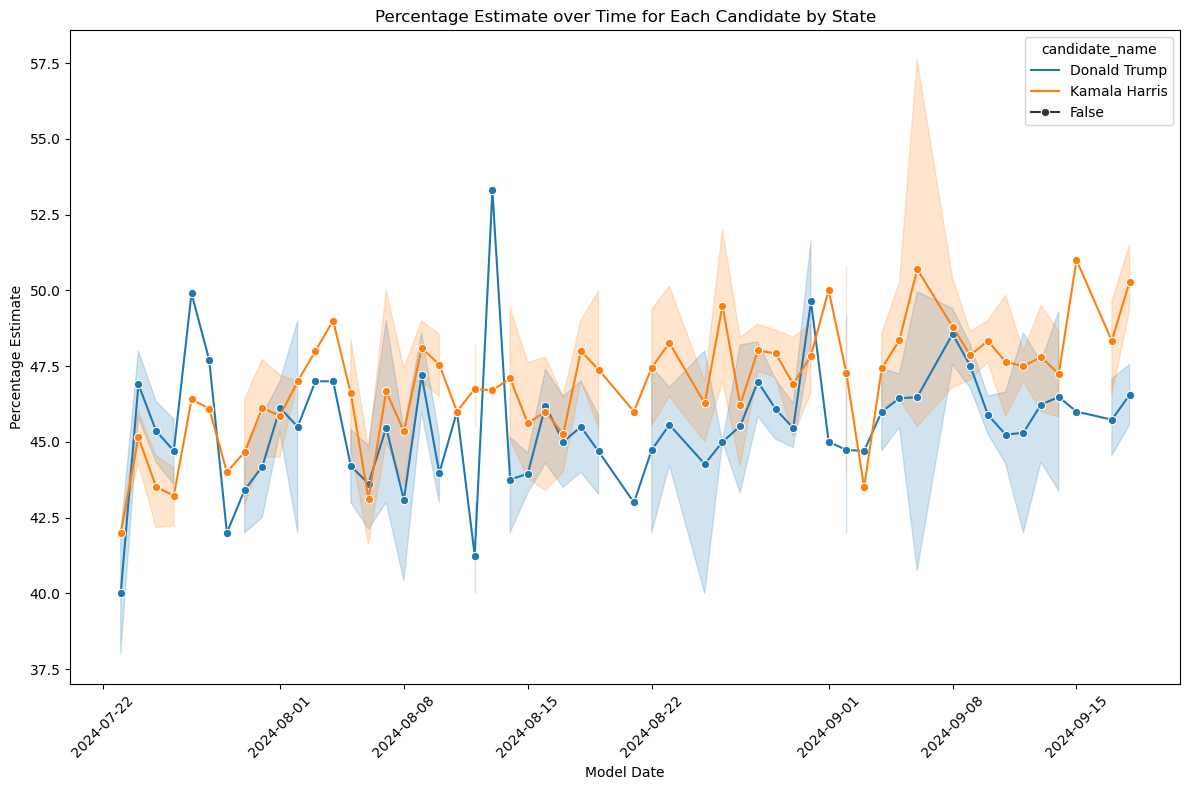

In [13]:
import datetime as dt
df['created_at'] = pd.to_datetime(df['created_at'])
df_sorted = df.sort_values(by='created_at',ascending=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_sorted, x='created_at', y='pct', hue='candidate_name', style='state'=='National', markers=True)
plt.xlabel('Model Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df[df['created_at'] == '2024-07-23']

,model_date,timestamp,cycle,state,created_at,start_date,end_date,election_date,pollster_rating_name,pollster_rating_id,...,region_num,response,pollster,pollster_coded,state_pollster,state_pollster_coded,mode,mode_coded,day_of_timeline,major_candidate_still_running
920,2024-09-18,2024-09-18T17:02:41Z,2024,National,2024-07-23,2024-07-22,2024-07-22,2024-11-05,Marist College,183,...,NaN,42.0,183,27,NA183,122,Online Non-Prob Panel,6,1,1
921,2024-09-18,2024-09-18T17:02:41Z,2024,National,2024-07-23,2024-07-22,2024-07-22,2024-11-05,Marist College,183,...,NaN,42.0,183,27,NA183,122,Online Non-Prob Panel,6,1,1
922,2024-09-18,2024-09-18T17:02:41Z,2024,National,2024-07-23,2024-07-22,2024-07-23,2024-11-05,Ipsos,154,...,NaN,42.0,154,23,NA154,121,Online Prob Panel,7,1,1
923,2024-09-18,2024-09-18T17:02:41Z,2024,National,2024-07-23,2024-07-22,2024-07-23,2024-11-05,Ipsos,154,...,NaN,38.0,154,23,NA154,121,Online Prob Panel,7,1,1


In [24]:
import datetime as dt
df = df_sorted
df.to_csv('daily_2024.csv', index=False)

df['created_at'] = pd.to_datetime(df['created_at'])

# Create a week start column
df['week_start'] = df['created_at'].dt.to_period('W').dt.start_time

# Group by week start and calculate the mean of poll percentages
weekly_averages = df.groupby(['week_start', 'candidate_name','state'])['pct'].mean().reset_index()

weekly_averages

weekly_averages.to_excel('output.xlsx', index=False)

/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_2940/1103093900.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=weekly_averages, x='week_start', y='pct', hue='candidate_name', style='state', markers=True,ci=None)


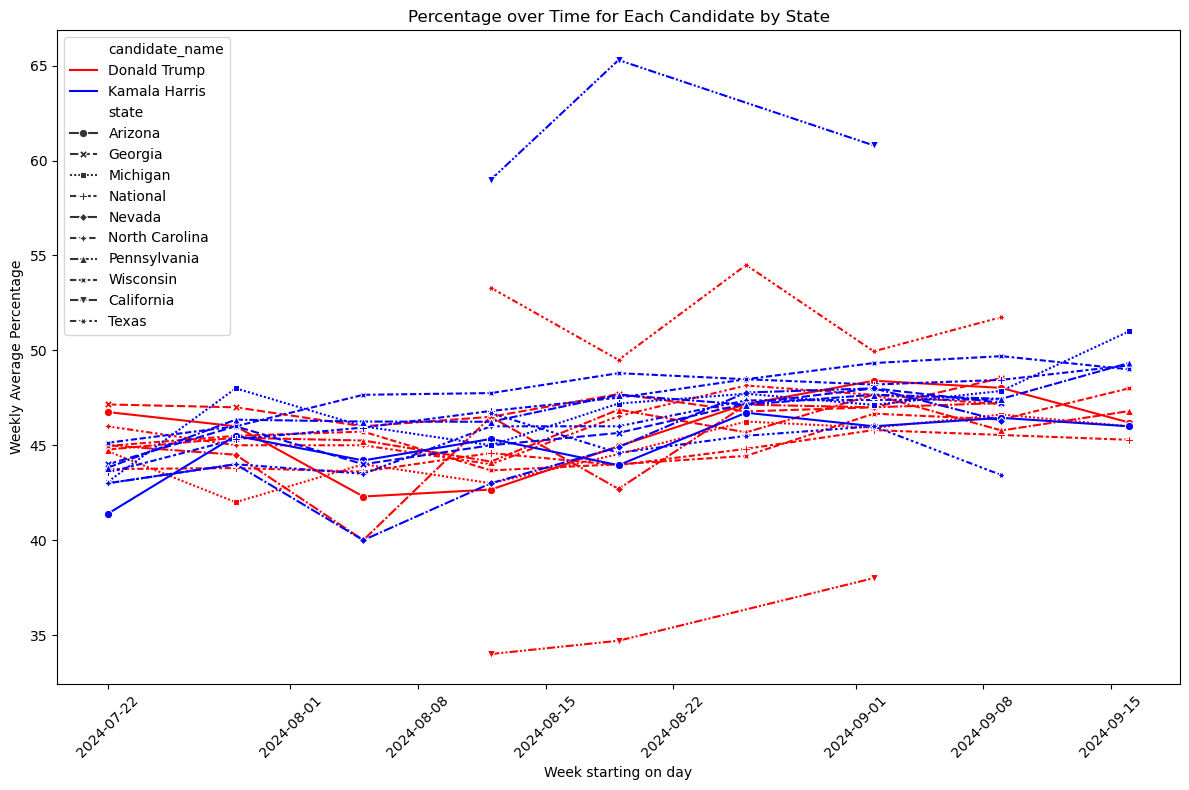

In [26]:
#general plot (currently all states)
import datetime as dt
#df['created_at'] = pd.to_datetime(df['created_at'])
#df_sorted = df.sort_values(by='created_at',ascending=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set_palette(['red', 'blue'])
sns.lineplot(data=weekly_averages, x='week_start', y='pct', hue='candidate_name', style='state', markers=True,ci=None)
plt.xlabel('Week starting on day')
plt.ylabel('Weekly Average Percentage')
plt.title('Percentage over Time for Each Candidate by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

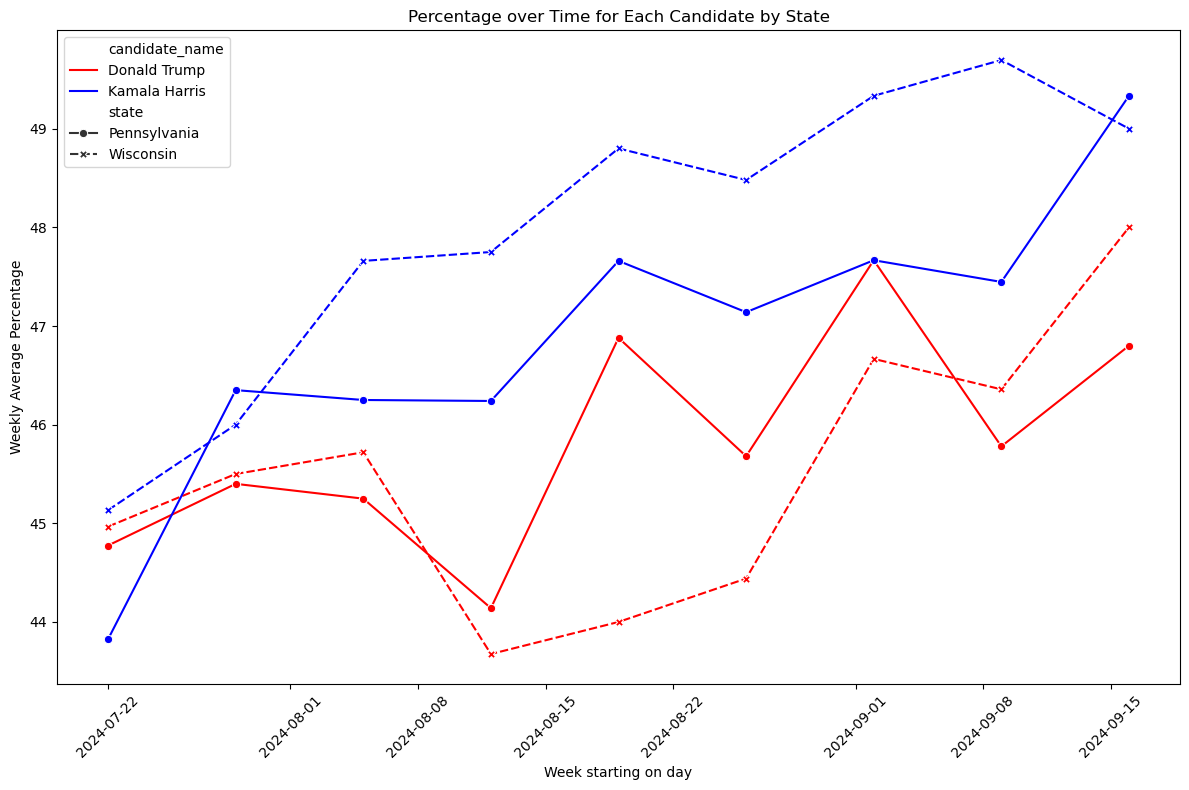

In [27]:
#Pennsylvania & Wisconsin
import datetime as dt
#df['created_at'] = pd.to_datetime(df['created_at'])
#df_sorted = df.sort_values(by='created_at',ascending=True)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_palette(['red', 'blue'])
sns.lineplot(data=weekly_averages[(weekly_averages['state'] == 'Pennsylvania') | (weekly_averages['state'] == 'Wisconsin')],x='week_start', y='pct', hue='candidate_name',style='state', markers=True)
plt.xlabel('Week starting on day')
plt.ylabel('Weekly Average Percentage')
plt.title('Percentage over Time for Each Candidate by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

weekly_averages.to_csv('weekly_averages2024.csv', index=False)
